In [86]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import ast
import json
import datetime

In [216]:
df_games= pd.read_csv("./data/csv/games_steam.csv")
df_games.shape

(32134, 13)

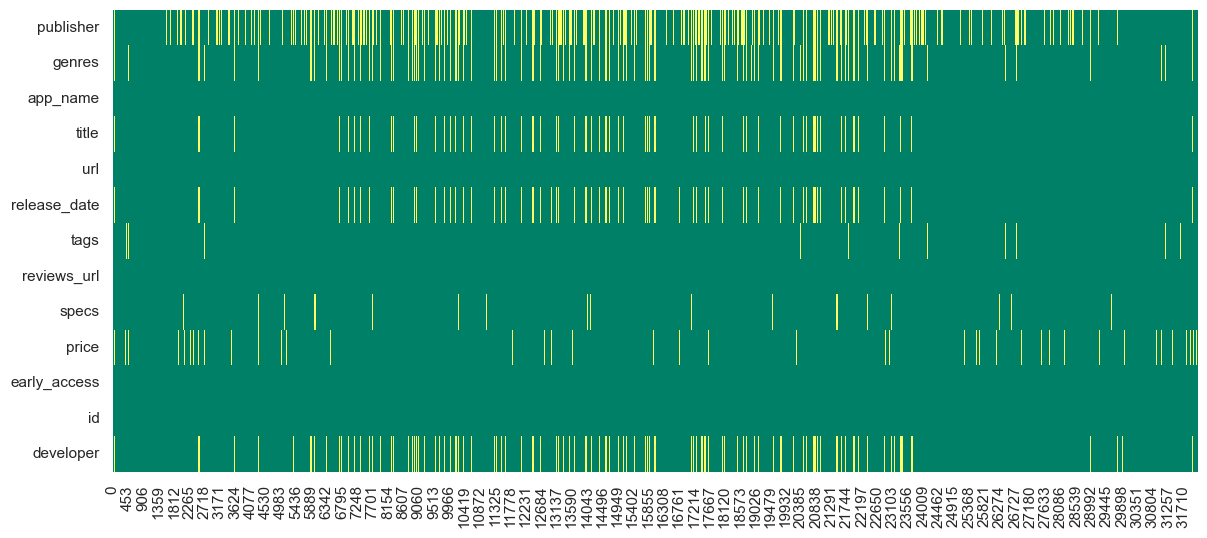

In [217]:
plt.figure(figsize=(14,6))
sns.heatmap(df_games.isnull().T, cmap= 'summer', cbar= False)
plt.show()

In [218]:
df_games.isnull().sum()

publisher       8070
genres          3282
app_name           1
title           2049
url                0
release_date    2140
tags             162
reviews_url        1
specs            669
price           1377
early_access       0
id                 1
developer       3298
dtype: int64

In [219]:
df_games.dtypes

publisher        object
genres           object
app_name         object
title            object
url              object
release_date     object
tags             object
reviews_url      object
specs            object
price            object
early_access       bool
id              float64
developer        object
dtype: object

In [220]:
df_games.head(2)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL


In [221]:

rows= []
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for register in df_games['release_date']:
    
    block = False
    try:
        rows.append(datetime.datetime.strptime(register, '%Y-%m-%d'))
        # print("Datetime:", register)
    except (ValueError, SyntaxError, TypeError):
        if type(register) != str:
            print("Registro: ", register)
            rows.append(np.nan)
        else:
            lista_Error = []
            cadena = ''
            for letter in register:
                if letter == ' ':
                    lista_Error.append(cadena)
                    cadena = ''
                elif letter != ' ':
                    cadena = cadena + letter
            lista_Error.append(cadena)
            for n, element in enumerate(lista_Error):
                for m, month in enumerate(months):
                    if month in element:
                        
                        if len(str(m + 1)) == 1:
                            lista_Error[n] = str('0' + str(m + 1))
                            i_month = str('0' + str(m + 1))
                        else:
                            lista_Error[n] = str(m + 1)
                            i_month = str(m + 1)
            register2 = "-".join(lista_Error)
            # print(register2, '/', register)
            try:
                for n, element in enumerate(lista_Error):
                    if len(str(element)) == 4:
                        try:
                            g = int(element)
                            year = str(element)
                        except ValueError:
                            print("ValueError:", element)
                            rows.append(np.nan)
                            block = True
                            break
                if block is False: 
                    lista_f = ['01', str(i_month), year]
                    register3 = '-'.join(lista_f)
                # print(register3)
                    try:
                        rows.append(datetime.datetime.strptime(register3, '%d-%m-%Y'))
                        print(register3, 'Datetime manual')
                    except TypeError:
                        print(register3, 'TypeError')
                        rows.append(np.nan)
            except NameError:
                print('NameError', register2)
                rows.append(np.nan)

Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro:  nan
Registro: 

In [222]:
df_games['release_date'] = rows

In [223]:
df_games.dtypes

publisher               object
genres                  object
app_name                object
title                   object
url                     object
release_date    datetime64[ns]
tags                    object
reviews_url             object
specs                   object
price                   object
early_access              bool
id                     float64
developer               object
dtype: object

In [224]:
df_games.to_csv("./data/csv/games_steam.csv", index= False)

In [235]:
reviews = pd.read_csv("./data/csv/user_review.csv")

In [236]:
pd.DataFrame(ast.literal_eval(reviews.reviews[0]))

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...


In [237]:
lista_fechas = []
month = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May':' 05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}
for register in reviews.reviews:
    lista_posted = []
    for rev_dict in ast.literal_eval(register):
        cadena = rev_dict['posted']
        if type(cadena) == str: cadena = cadena.replace('Posted ', ''); cadena = cadena.replace('.', '')
        for mon in list(month.keys()):
            if mon in cadena: cadena = cadena.replace(f"{mon}", f"{month[f'{mon}']}"); mes = month[f"{mon}"]
        for let in cadena: 
            if let == ' ': cadena = cadena.replace(' ', '', 1); break
            else: break
        cadena = cadena.replace(",", ''); cadena = cadena.replace(" ", '-')
        try: cadena = datetime.datetime.strptime(cadena, '%m-%d-%Y')
        except ValueError: 
            cadena = cadena + '-2025'
            try: cadena = datetime.datetime.strptime(cadena, '%m-%d-%Y')
            except ValueError: pass
        # print(cadena)
        lista_posted.append(cadena)
    lista_fechas.append(lista_posted)

In [238]:
len(lista_fechas)

25799

In [239]:
reviews['dates_posted'] = lista_fechas

In [240]:
reviews.head()

,user_id,user_url,reviews,dates_posted
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...","[2011-11-05 00:00:00, 2011-07-15 00:00:00, 201..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...","[2014-06-24 00:00:00, 2013-09-08 00:00:00, 201..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...","[2025-02-03 00:00:00, 2015-12-04 00:00:00, 201..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...","[2013-10-14 00:00:00, 2012-07-28 00:00:00, 201..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...","[2014-04-15 00:00:00, 2013-12-23 00:00:00, 201..."


In [241]:
type(reviews.reviews[0])

str

In [242]:
reviews.reviews = reviews.reviews.apply(lambda x: ast.literal_eval(x))

In [243]:
reviews.to_csv("./data/csv/user_review.csv", index= False)

---
Funciones
---

In [2]:
import pandas as pd
import numpy as np
import ast, datetime

In [3]:
reviews = pd.read_csv("./data/csv/user_review.csv")
games = pd.read_csv("./data/csv/games_steam.csv")
items = pd.read_csv("./data/csv/df_items.csv")

In [4]:
games.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro


In [5]:
reviews.head(1)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."


In [6]:
items.head(1)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."


In [7]:
list_items = ast.literal_eval(items['items'].iloc[0])

In [8]:
list_items_ID = []
for item in list_items:
    list_items_ID.append(item['item_id'])
list_prices = []
for id in list_items_ID:
    price = list(games['price'][games['id'] == float(id)].values)
    list_prices.extend(price)
print(list_prices)

['9.99', '4.99', '4.99', '4.99', '4.99', '4.99', '9.99', '4.99', '9.99', '19.99', '9.99', '19.99', '19.99', '9.99', '9.99', '6.99', '19.99', '19.99', '9.99', '4.99', nan, '9.99', '7.99', '9.99', '7.99', '4.99', '19.99', '19.99', '9.99', '9.99', '9.99', '2.99', '2.99', '19.99', '9.99', '19.99', '19.99', '19.99', '19.99', '19.99', '9.99', '14.99', '19.99', 'Free', '4.99', '4.99', '4.99', '14.99', '9.99', '19.99', '9.99', '9.99', '9.99', '19.99', '9.99', '19.99', '19.99', '14.99', '9.99', '19.99', '19.99', '9.99', '6.99', '19.99', '19.99', '19.99', '6.99', '19.99', '9.99', '19.99', '19.99', '14.99', '9.99', '54.99', '19.99', '19.99', '29.99', '4.99', '4.99', '19.99', '29.99', '14.99', '9.99', '9.99', '9.99', '14.99', '9.99', '39.99', '4.99', '14.99', '9.99', '9.99', '9.99', '19.99', 'Free', '14.99', '2.99', '4.99', '9.99', '4.99', '19.99', '9.99', '9.99', '9.99', '9.99', '9.99', '4.99', '4.99', '9.99', '9.99', '19.99', '9.99', '24.99', '19.99', '9.99', '19.99', '19.99', '19.99', '19.99', 

In [11]:
list_reviews = ast.literal_eval(reviews['reviews'].iloc[0])
list_reviews

[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

In [12]:
countRecommend = 0
for revw in list_reviews:
    if revw['item_id'] in list_items_ID:
        if revw['recommend'] is True:
            countRecommend += 1

countRecommend

3

In [16]:
percent = round(countRecommend * 100 / len(list_items), 3)

1.083

In [19]:
info = reviews[reviews['user_id'] == "JustMielThings"]
items_2 = ast.literal_eval(info['reviews'].iloc[0])
items_2

[{'funny': '',
  'posted': 'Posted May 20.',
  'last_edited': '',
  'item_id': '570',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Good one'}]